# **Real-Time Communication System Powered By AI For Specially Abled**

**Loading the Dataset & Image Data Generation**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Training Dataset
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Dataset
test_datagen = ImageDataGenerator(rescale=1/255)


In [3]:
# Training Dataset
x_train=train_datagen.flow_from_directory('training_set',target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory('test_set',target_size=(64,64), class_mode='categorical',batch_size=900)


Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [4]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  18
Len x-test :  3


In [5]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

**Model Creation**

In [6]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [7]:
# Creating Model
model=Sequential()

In [8]:
# Adding Convolution Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [9]:
# Adding Pool Layers
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
# Adding Flatten Layers
model.add(Flatten())

In [11]:
# Adding Dense Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [12]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

C:\Users\91936\AppData\Local\Temp/ipykernel_1340/1042518445.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
18/18 [==============================] - 34s 2s/step - loss: 0.8681 - accuracy: 0.7029 - val_loss: 0.2913 - val_accuracy: 0.9187
Epoch 2/10
18/18 [==============================] - 34s 2s/step - loss: 0.1690 - accuracy: 0.9523 - val_loss: 0.2492 - val_accuracy: 0.9529
Epoch 3/10
18/18 [==============================] - 36s 2s/step - loss: 0.0685 - accuracy: 0.9823 - val_loss: 0.1681 - val_accuracy: 0.9716
Epoch 4/10
18/18 [==============================] - 37s 2s/step - loss: 0.0345 - accuracy: 0.9918 - val_loss: 0.2067 - val_accuracy: 0.9764
Epoch 5/10
18/18 [==============================] - 37s 2s/step - loss: 0.0201 - accuracy: 0.9942 - val_loss: 0.2200 - val_accuracy: 0.9760
Epoch 6/10
18/18 [==============================] - 39s 2s/step - loss: 0.0120 - accuracy: 0.9977 - val_loss: 0.2369 - val_accuracy: 0.9769
Epoch 7/10
18/18 [==============================] - 40s 2s/step - loss: 0.0089 - accuracy: 0.9980 - val_loss: 0.2407 - val_accuracy: 0.9778
Epoch 8/10
18/18 [==

**Saving the Model**

In [14]:
#Saving the model
model.save('aslpng1.h5')

**Testing the model**

In [15]:
#Importing the necessary packages
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [16]:
#Loading the saved model
model=load_model('aslpng1.h5')

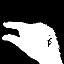

In [20]:
#Loading the test image
test_image=image.load_img('test_set/G/162.png',
                   target_size=(64,64))
test_image

**Image Preprocessing**

In [25]:
#image to array conversion
tmp=image.img_to_array(test_image)

In [26]:
#Image Dimension expansion
print('Image Dimension before expansion',tmp.ndim)
tmp=np.expand_dims(tmp,axis=0)
print('Image Dimension after expansion',tmp.ndim)

Image Dimension before expansion 3
Image Dimension after expansion 4


**Prediction**

In [28]:
prediction=np.argmax(model.predict(tmp),axis=1)
index=['A','B','C','D','E','F','G','H','I']
print(index[prediction[0]])

G
